In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pickle
import sys

sys.path.append("../lib") # add code library to paths

# add lib to path 
from visualize import *



In [4]:
netname = 'forward_nn'
stimname = 'gStep'
sigB = np.load(f'../output/{netname}/{stimname}/BC_grid_{stimname}.npy')
sigA = np.load(f'../output/{netname}/{stimname}/AC_grid_{stimname}.npy')
sigG = np.load(f'../output/{netname}/{stimname}/GC_grid_{stimname}.npy')
stim = np.load(f'../output/{netname}/{stimname}/stim_grid_{stimname}.npy')

output = [stim,sigB,sigA,sigG]
        
with open(f'../output/{netname}/params.pkl', 'rb') as f:
    params = pickle.load(f)


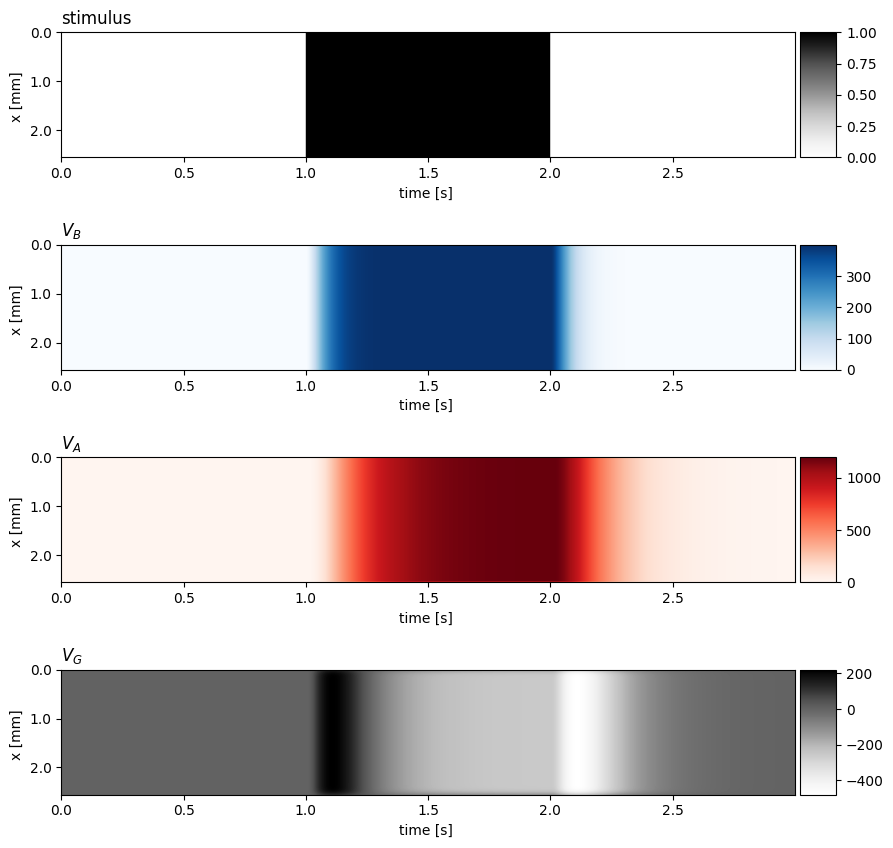

In [5]:
fig = plot_grid(output,params)

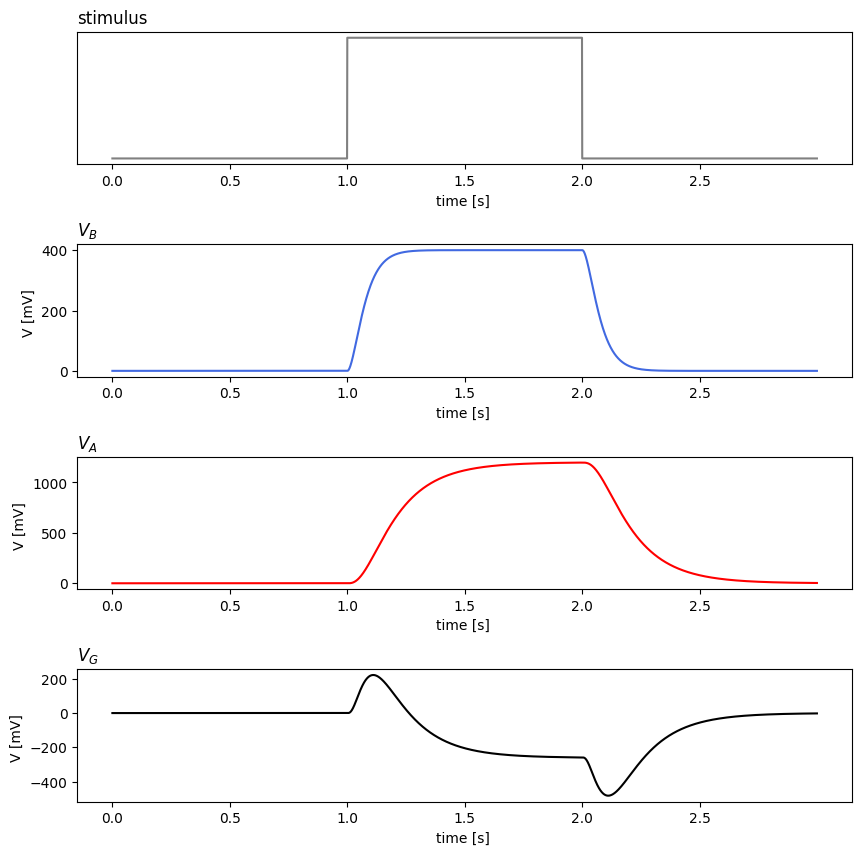

In [6]:
fig = plot_timetrace(output, params)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load df
stimname = 'gStep'
df = pd.read_csv(f'../output/{netname}/{stimname}/grid_steadystate.csv')

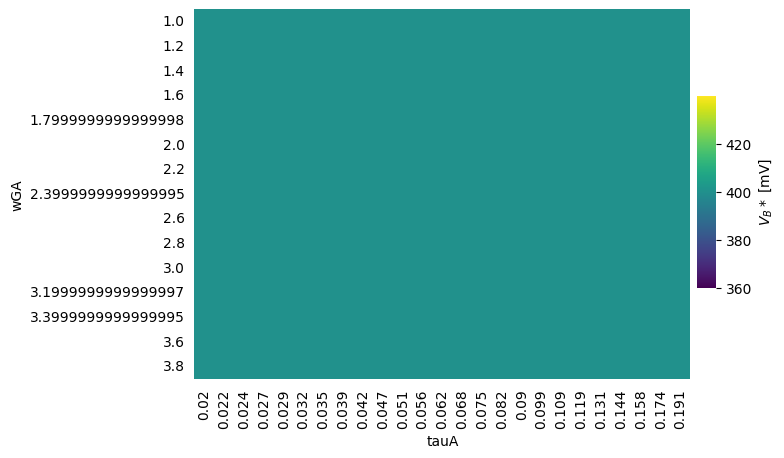

In [8]:
fig,ax = plt.subplots(1)

# plot heatmap for beta
cbar_ax = fig.add_axes([.91, .3, .03, .4])
heatmap = df.pivot_table(index = 'wGA',columns = 'tauA',values = 'VB*', aggfunc = 'mean')
coo = sns.heatmap(heatmap, cmap = 'viridis', ax = ax,  cbar_ax=cbar_ax,cbar_kws={'label': r'$V_{B}*$ [mV]'})
ax.tick_params(left=False, bottom=False)

